In [11]:
import tensorflow as tf
import numpy as np

from keras.layers import Conv2D, MaxPool2D, Dense, Input, GlobalMaxPooling2D
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [12]:
(xtrain, ytrain) , (xtest, ytest) = fashion_mnist.load_data()
xtest.shape

(10000, 28, 28)

In [13]:


xtrain = xtrain.reshape(-1, 28, 28, 1)
xtest = xtest.reshape(-1, 28, 28, 1)

xtrain = xtrain / 255
xtest = xtest / 255


In [14]:
# Build the model

i = Input(shape=(xtrain[0].shape))
x = Conv2D(32, (3, 3), padding="valid", activation="relu")(i)
x = MaxPool2D()(x)
x = Conv2D(64, (3, 3), padding="valid", activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(128, (3, 3), padding="valid", activation="relu")(x)
x = MaxPool2D()(x)
x = GlobalMaxPooling2D()(x)
x = Dense(28*28, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)


In [15]:
model.compile(
    optimizer="Adam",
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [16]:
r = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    epochs=10,
    batch_size=32
)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5576 - accuracy: 0.7943 - val_loss: 0.4203 - val_accuracy: 0.8426
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3647 - accuracy: 0.8652 - val_loss: 0.3909 - val_accuracy: 0.8564
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3096 - accuracy: 0.8851 - val_loss: 0.3781 - val_accuracy: 0.8624
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2761 - accuracy: 0.8960 - val_loss: 0.3071 - val_accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2475 - accuracy: 0.9073 - val_loss: 0.3106 - val_accuracy: 0.8851
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2265 - accuracy: 0.9139 - val_loss: 0.3140 - val_accuracy: 0.8894
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2088 - accuracy: 0.9208 - val_loss: 0.3173 -

313/313 [==============================] - 1s 3ms/step


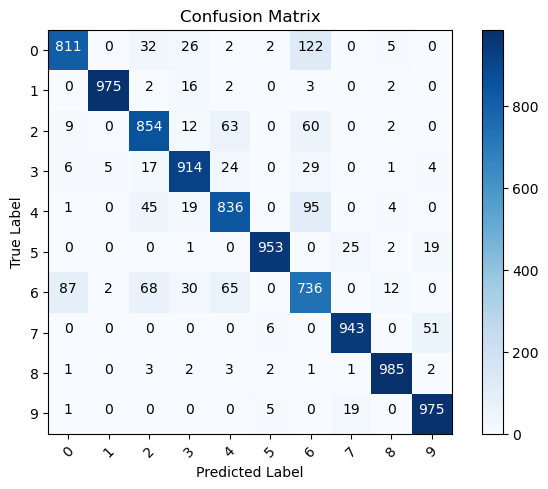

In [17]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

p_test = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, p_test)
plot_confusion_matrix(cm, list(range(10)))